Simple IPython notebook code for credit card fraud detection:

Python Code for Credit Card Fraud Detection

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

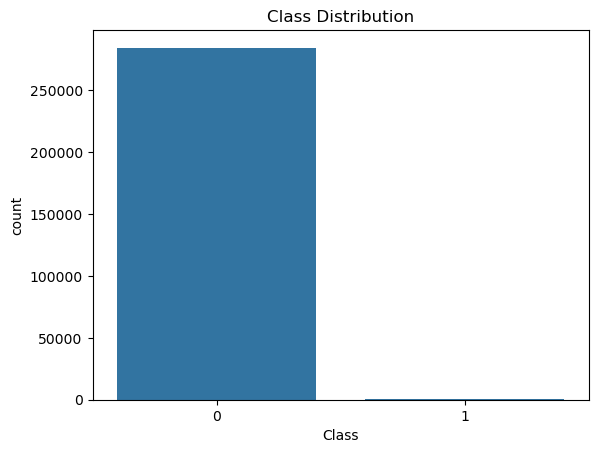

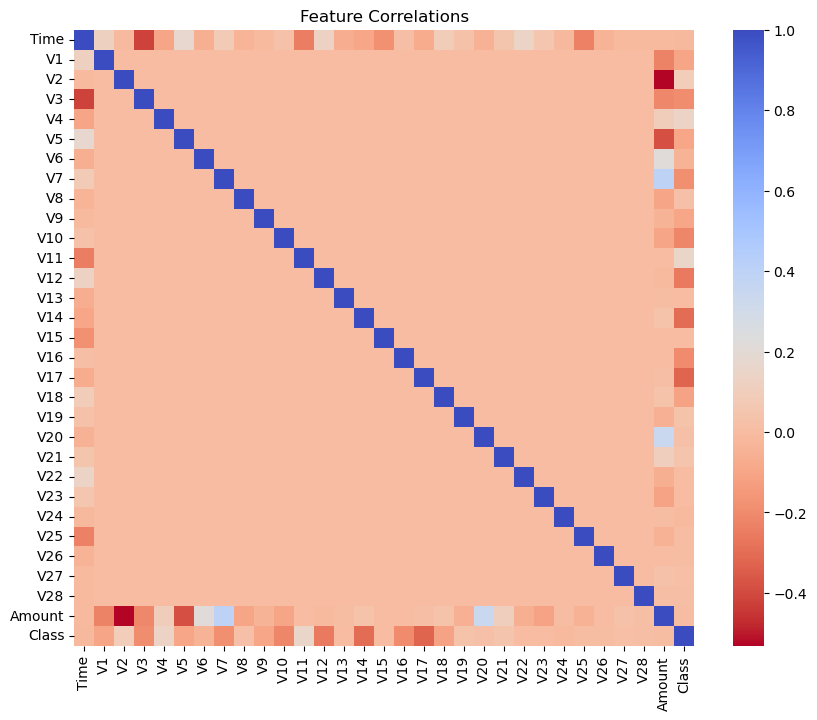

Confusion Matrix:
 [[85290     5]
 [   36   112]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995201479348805


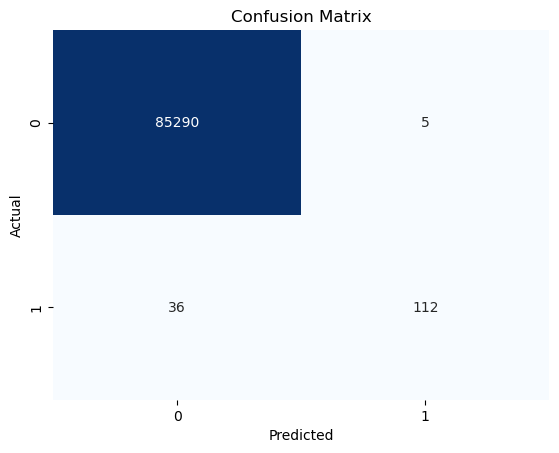

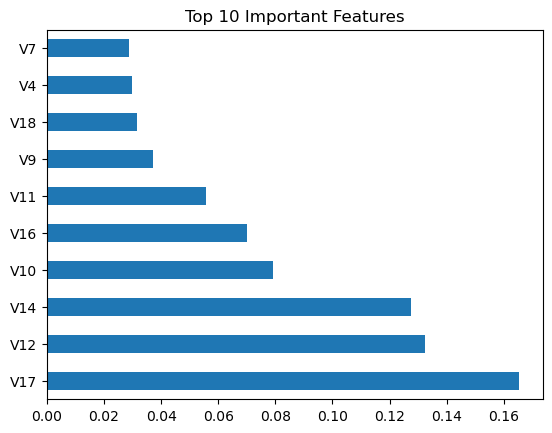

In [9]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset
# You can find a popular dataset for credit card fraud detection here: https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv('creditcard.csv')

# Step 3: Data exploration
print("Dataset shape:", data.shape)
print(data.head())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Step 4: Data visualization
# Visualize the distribution of the 'Class' variable to see the imbalance
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Visualizing correlations between the features and the target (fraud or not)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="coolwarm_r")
plt.title("Feature Correlations")
plt.show()

# Step 5: Data preprocessing
# Separate the features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 9: Visualizing the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Optional: Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


Explanation of the code
Loading the Dataset:

You need to have a dataset to train the fraud detection model. You can use the Credit Card Fraud Detection dataset from Kaggle which is widely used for such problems.
Data Exploration and Visualization:

Before training the model, we visualize the data to understand the distribution and correlation of the features with fraud.
Data Preprocessing:

The dataset is highly imbalanced, so we preprocess the data by scaling and splitting it into training and testing sets.
Random Forest Classifier:

A Random Forest Classifier is used here to classify transactions as either fraudulent or legitimate. This can be replaced by other models (e.g., logistic regression, decision trees, neural networks, etc.) depending on experimentation and fine-tuning.
Evaluation:

After training the model, we evaluate its performance using confusion matrices, accuracy scores, and classification reports.
Feature Importance:

To understand which features contribute the most to detecting fraud, the feature importance is visualized.
Next Steps:
Handling Class Imbalance: Since fraud cases are rare, you may want to use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.
Tuning Hyperparameters: Use cross-validation or grid search to find the best hyperparameters for the model.
More Complex Models: Experiment with more advanced models like gradient boosting, neural networks, or ensemble methods to improve performance.